In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Hannanum

In [2]:
# 데이터를 불러옵니다.
data = pd.read_csv('../data/train.csv')

In [3]:
# 토큰화 함수 정의
hannanum = Hannanum()
def word_tokenize(sentence):
    return hannanum.morphs(sentence)

In [4]:
# 토큰의 길이를 구해서 새로운 컬럼을 만들어줍니다.
data['sentence_1_length'] = data['sentence_1'].apply(lambda x: len(word_tokenize(x)))
data['sentence_2_length'] = data['sentence_2'].apply(lambda x: len(word_tokenize(x)))

In [5]:
# 데이터셋의 정보를 출력
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9324 non-null   object 
 1   source             9324 non-null   object 
 2   sentence_1         9324 non-null   object 
 3   sentence_2         9324 non-null   object 
 4   label              9324 non-null   float64
 5   binary-label       9324 non-null   float64
 6   sentence_1_length  9324 non-null   int64  
 7   sentence_2_length  9324 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 582.9+ KB


In [6]:
# 데이터셋의 처음 5개의 행을 출력
data.head()

,id,source,sentence_1,sentence_2,label,binary-label,sentence_1_length,sentence_2_length
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,16,9
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,10,11
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,8,9
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,9,12
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,5,10


In [7]:
# 데이터셋의 통계 정보
print("\nSummary statistics of Train Dataset:")
print(data.describe())


Summary statistics of Train Dataset:
             label  binary-label  sentence_1_length  sentence_2_length
count  9324.000000   9324.000000        9324.000000        9324.000000
mean      1.849968      0.389532          10.840305          11.401544
std       1.602212      0.487670           7.458385           7.235668
min       0.000000      0.000000           1.000000           1.000000
25%       0.200000      0.000000           6.000000           7.000000
50%       1.600000      0.000000           9.000000          10.000000
75%       3.400000      1.000000          13.000000          14.000000
max       5.000000      1.000000          54.000000          88.000000


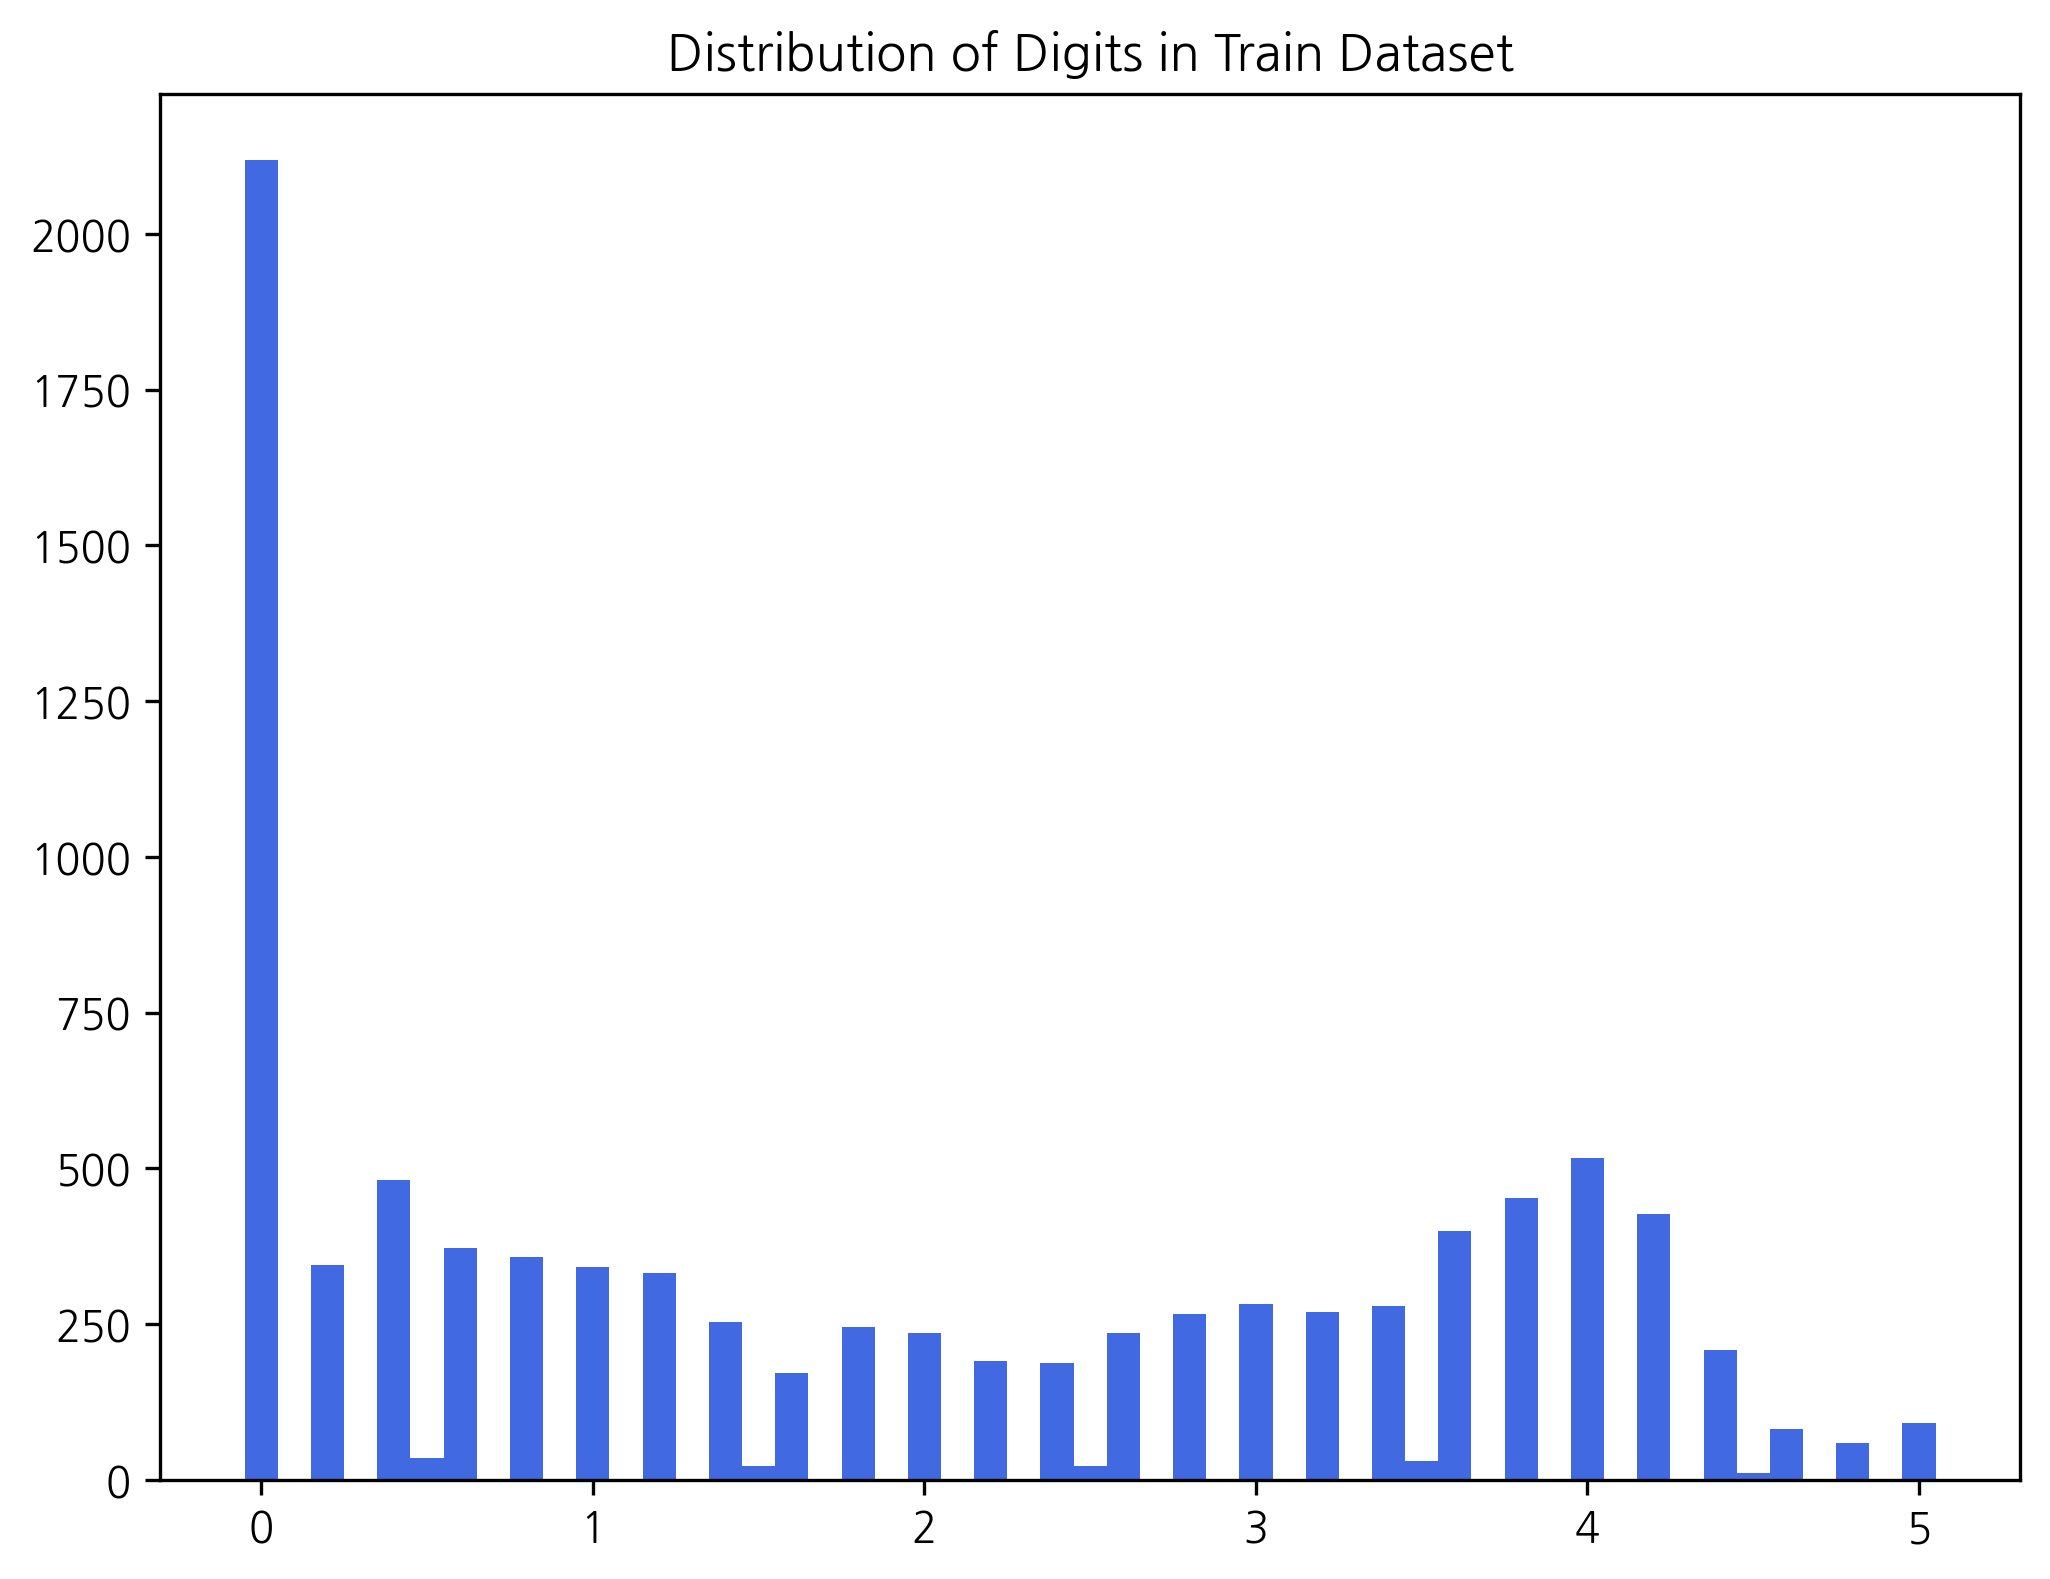

In [8]:
# 데이터셋의 레이블 분포를 시각화
label = data['label']
counts = label.value_counts()

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(counts.keys(), counts.values, color='royalblue', width=0.1)
ax.set_title('Distribution of Digits in Train Dataset')
ax.set_xticks([0,1,2,3,4,5])

plt.show()

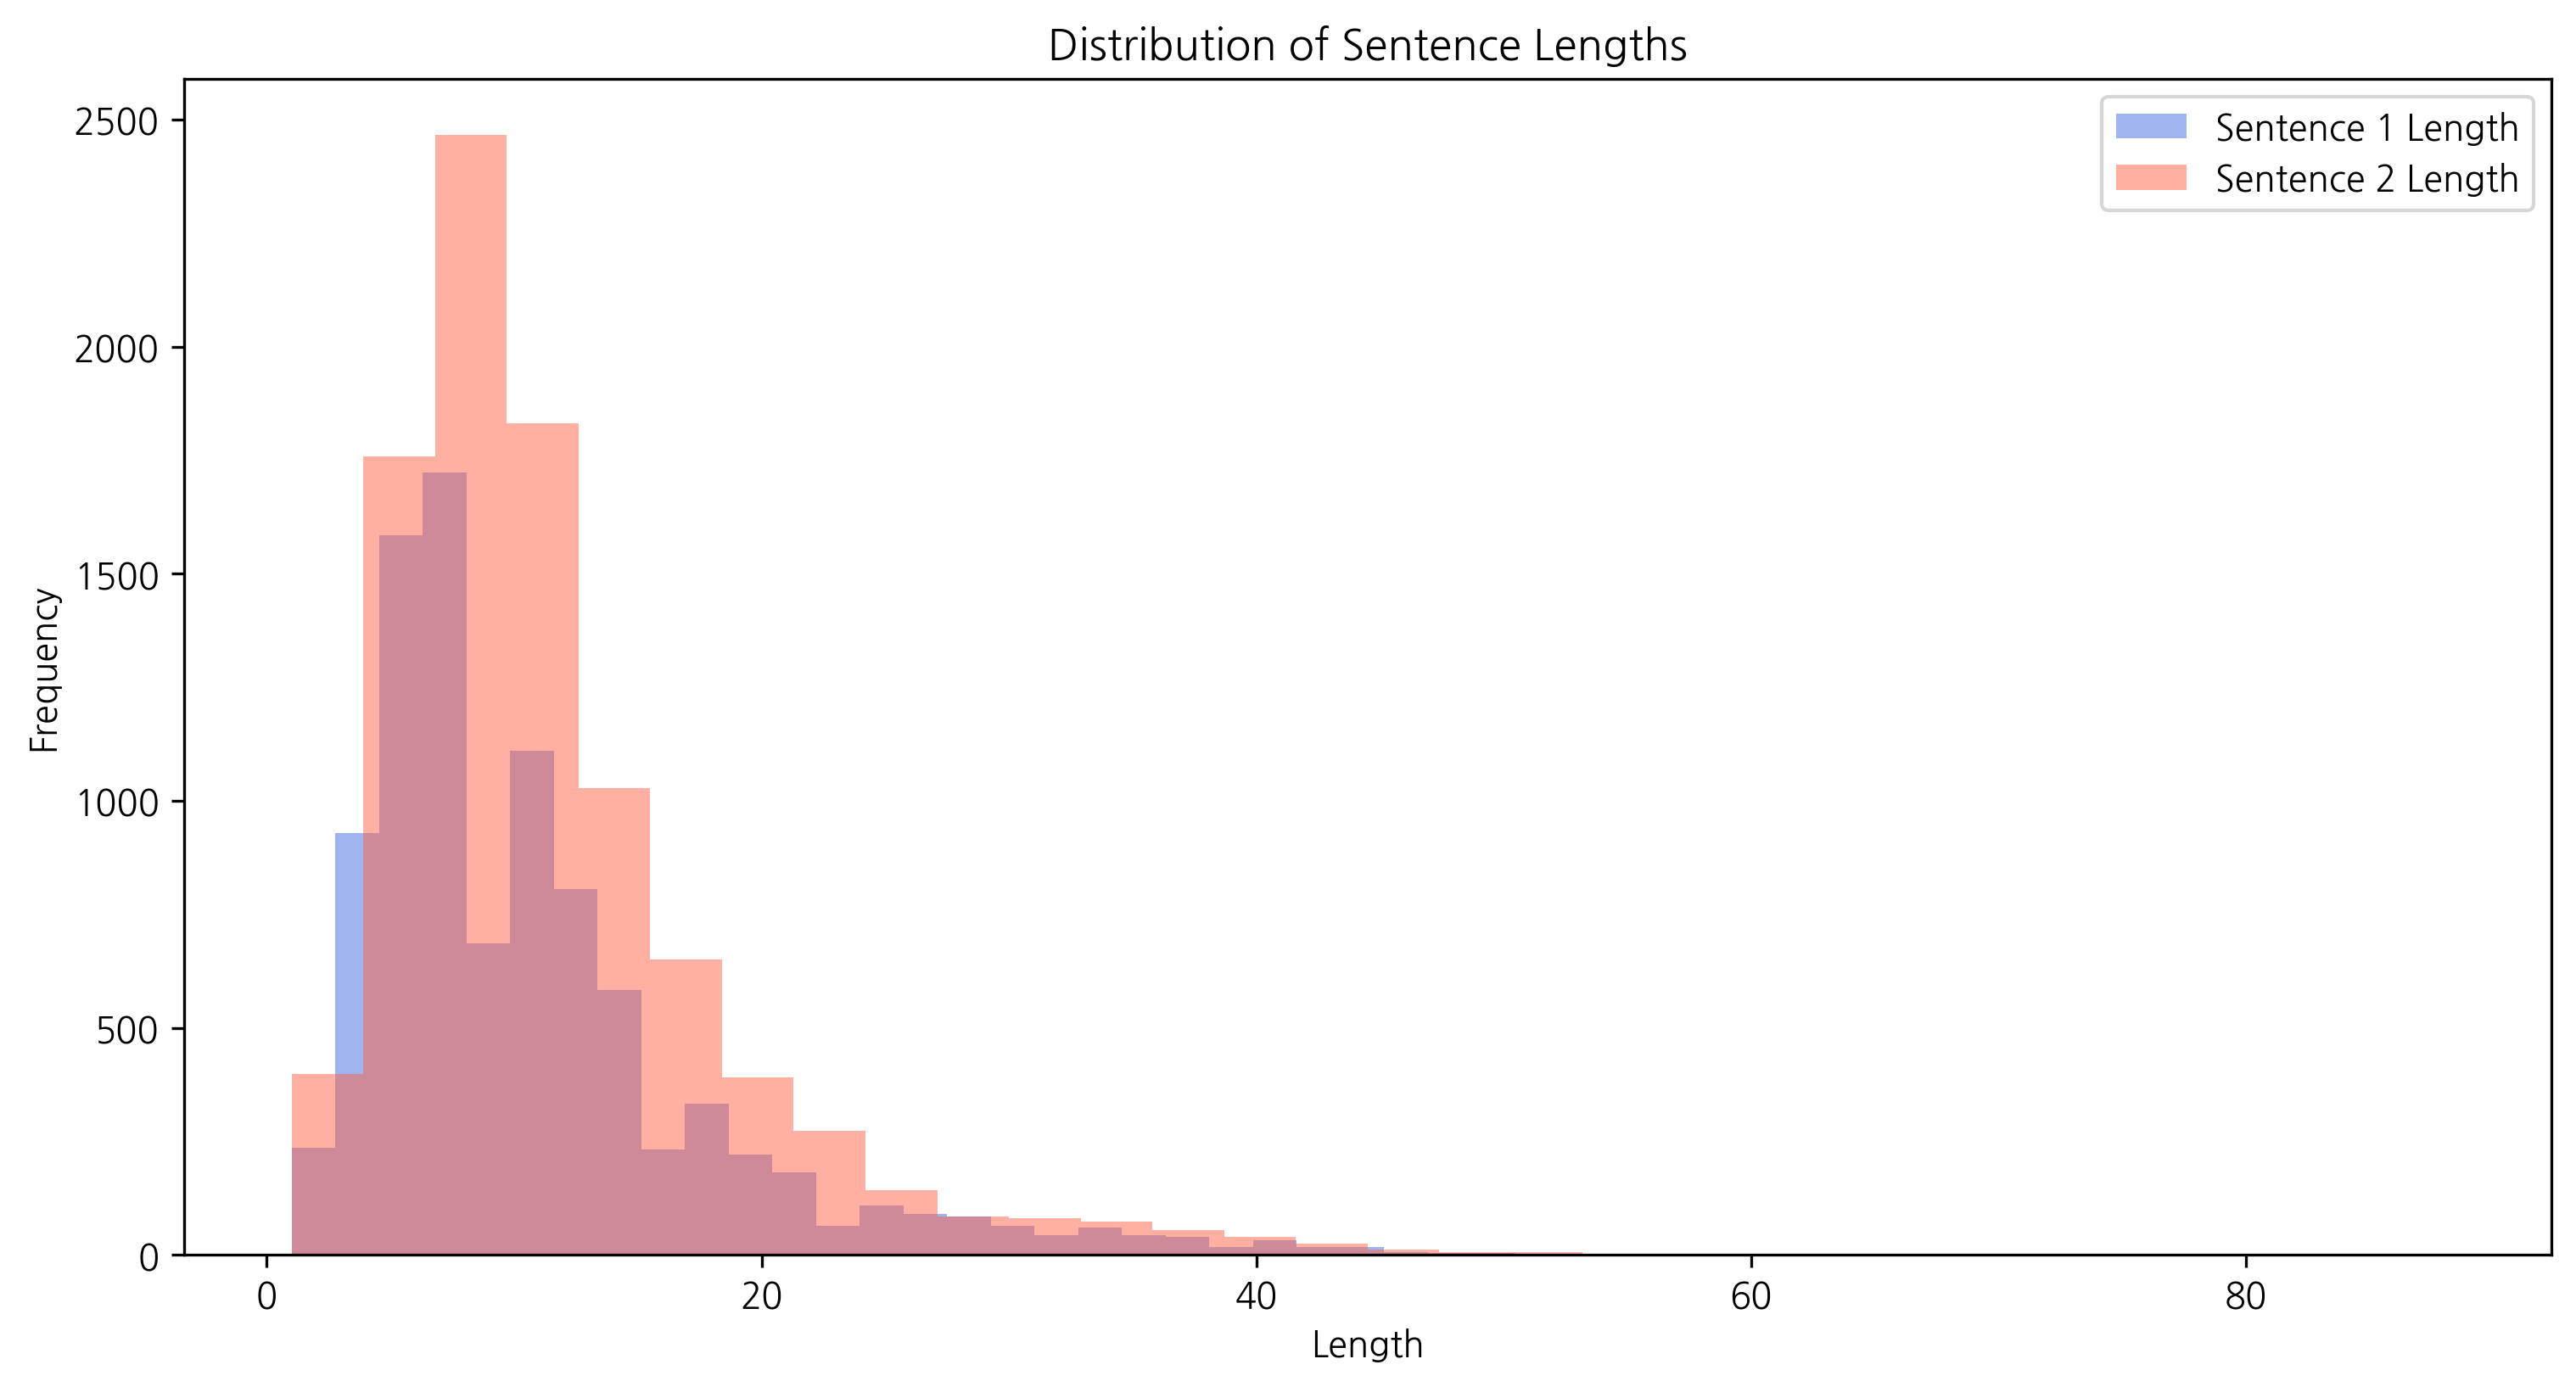

In [9]:
# 문장 길이의 분포를 시각화
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(data['sentence_1_length'], bins=30, alpha=0.5, label='Sentence 1 Length', color='royalblue')
ax.hist(data['sentence_2_length'], bins=30, alpha=0.5, label='Sentence 2 Length', color='tomato')

ax.set_title('Distribution of Sentence Lengths')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()